### Introduction to Machine Learning with Python
### Andreas C.Müller & Sarah Guido

In [1]:
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [2]:
from scipy import sparse

# create a 2d numpy array with diagonal of ones, and
#zeros everywhere else

eye = np.eye(4, dtype = int)
print(eye)

# convert numpy arrary to a scipy sparse matrix 
# in CSR format
# only the non-zero entries are stored

sparse_matrix = sparse.csr_matrix(eye)
print(" \n Scipy sparse CSR matrix:\n", sparse_matrix)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
 
 Scipy sparse CSR matrix:
   (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1


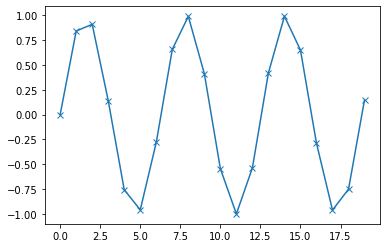

In [3]:
import matplotlib.pyplot as plt

# Generate a sequence of integers
x = np.arange(20)
# Second array sin
y = np.sin(x)
# The plot function makes a line chart of
# one array against another
plt.plot(x, y, marker = 'x')

In [4]:
import pandas as pd

data = {'Name:': ["Denis", "Barış", "Can"],
       'Location': ["Adana", "Antep", "Kalbim"],
       'Age' : [27, 12, 20] }

data_pandas = pd.DataFrame(data)
data_pandas

,Name:,Location,Age
0,Denis,Adana,27
1,Barış,Antep,12
2,Can,Kalbim,20


In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

print(iris['DESCR'][:193] + " \n")
print(iris['target_names'], "\n")
print(iris['feature_names'], "\n")
print(type(iris['data']), "\n")
print(iris['data'].shape, "\n") # row --> flowers columns --> four meas.


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre 

['setosa' 'versicolor' 'virginica'] 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

<class 'numpy.ndarray'> 

(150, 4) 



In [6]:
print(iris.data[:5], "\n")
print(type(iris['target']), "\n") 
# the target array contains the species of each of 
# the flowers that were measured
print(iris['target'].shape, "\n")
# target is 1d array, with one entry per flower

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

<class 'numpy.ndarray'> 

(150,) 



In [7]:
print(iris.target[:3]) 
print(iris.target_names)
# 0 --> setosa, 1 --> versicolor, 2 --> virginica

[0 0 0]
['setosa' 'versicolor' 'virginica']


Measuring Success: Training and testing data


In [8]:
# train_test_split
# default %75 row --> data training 
# %25 --> test

# In scikit-learn data capital X // labels lower-case 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split\
(iris['data'], iris['target'], random_state = 0)

print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


### Scatter plot 

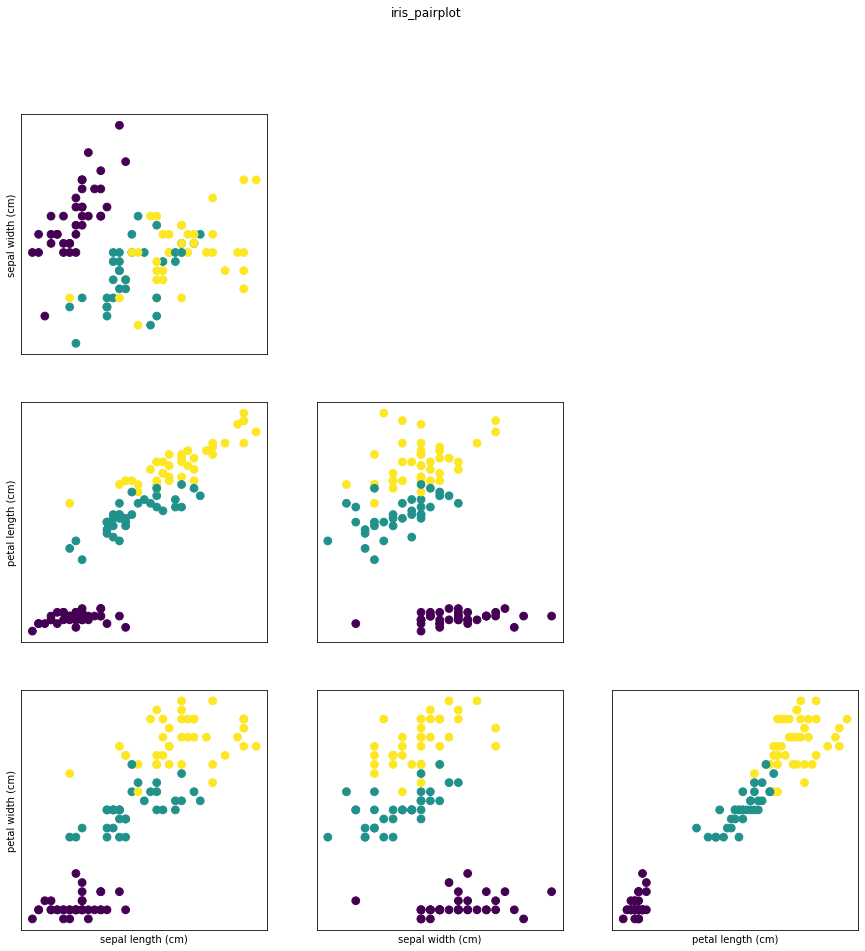

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("iris_pairplot")

for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i+1], c = y_train, s= 60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i+1])
            
        if j>i:
             ax[i, j].set_visible(False)           


In [18]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 1) # it will just store the training set

knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30,\
                     metric='minkowski', metric_params= None,\
                     n_jobs=1, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [20]:
X_new = np.array([[5, 2.9, 1, 0.2]]) #sepal 5,sepalw 2.9, petal 1, petalw 0.2
X_new.shape

(1, 4)

In [25]:
prediction = knn.predict(X_new)
print(prediction)

iris['target_names'][prediction] # setosa 


[0]


array(['setosa'], dtype='<U10')

In [29]:
y_pred = knn.predict(X_test)
print(np.mean(y_pred == y_test))

knn.score(X_test, y_test)

0.9736842105263158


0.9736842105263158

In [ ]:
#